In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *
from tsmoothie.utils_func import create_windows

In [2]:
data = pd.read_csv('Reference_Conditions_test.txt',delimiter = "\\t")

t=data['HORA']
data = data[data.columns[2:]]
data.head()

c:\users\reza\anaconda3\envs\tf7\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,PT001,PT002,PT003,PT004,PT005,PT006,PT007,BP001,BP002,FT001,...,TT018,TT019,TT020,TT021,TT022,TT023,TT024,TT025,TT026,INTENSIDAD
0,3.626,3.407,4.352,1.434,1.208,1.499,1.305,1.476,1.183,0.113,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
1,3.627,3.404,4.352,1.434,1.208,1.499,1.306,1.479,1.186,0.113,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
2,3.626,3.407,4.351,1.435,1.209,1.499,1.306,1.477,1.182,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
3,3.627,3.407,4.352,1.434,1.209,1.499,1.306,1.478,1.182,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
4,3.627,3.408,4.352,1.434,1.209,1.499,1.306,1.476,1.184,0.115,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506


In [3]:
color_list = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan",
              "blue","orange","green","red","purple","brown","pink","gray","olive","cyan",
              "blue","orange","green","red","purple","brown","pink","gray","olive","cyan",
              "blue","orange","green","red","purple","brown","pink","gray","olive","cyan"
]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()
    plt.show()

#Visualize(data)

In [4]:
data

,PT001,PT002,PT003,PT004,PT005,PT006,PT007,BP001,BP002,FT001,...,TT018,TT019,TT020,TT021,TT022,TT023,TT024,TT025,TT026,INTENSIDAD
0,3.626,3.407,4.352,1.434,1.208,1.499,1.305,1.476,1.183,0.113,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
1,3.627,3.404,4.352,1.434,1.208,1.499,1.306,1.479,1.186,0.113,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
2,3.626,3.407,4.351,1.435,1.209,1.499,1.306,1.477,1.182,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
3,3.627,3.407,4.352,1.434,1.209,1.499,1.306,1.478,1.182,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
4,3.627,3.408,4.352,1.434,1.209,1.499,1.306,1.476,1.184,0.115,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,3.623,3.404,4.348,1.435,1.203,1.500,1.297,1.476,1.183,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.505
8902,3.623,3.404,4.348,1.435,1.203,1.500,1.297,1.478,1.183,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.505
8903,3.624,3.402,4.349,1.435,1.202,1.500,1.297,1.478,1.184,0.114,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.505
8904,3.622,3.406,4.349,1.435,1.203,1.500,1.297,1.477,1.184,0.112,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,0.0,0.0,12.505


Text(0, 0.5, 'Voltage')

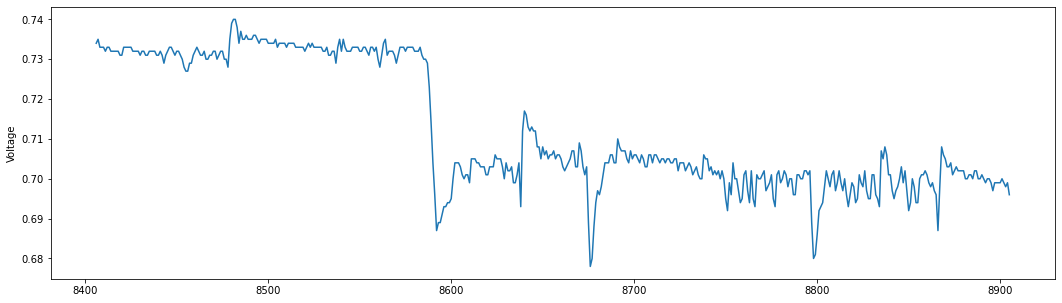

In [5]:
### PLOT TRAFFIC SAMPLE ###
data.V001.tail(500).plot(figsize=(18,5))
plt.ylabel('Voltage')

In [6]:
df = data.drop(columns=['V003' ,'V004' ,'V005' ,'TT009','TT011','TT012',
 'TT016','TT017','TT018','TT019','TT020','TT021','TT022','TT023','TT024','TT025','TT026',
                        'FT005','HT002','V006','V007'],axis=1)

In [7]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import MinMaxScaler

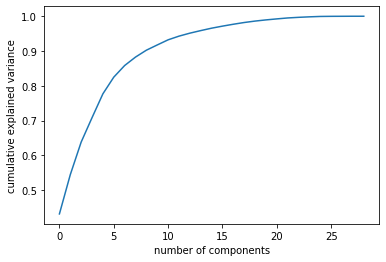

In [8]:
X = df.values # getting all values as a matrix of dataframe 
sc = MinMaxScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
pca = PCA()
X_pca = pca.fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
pca = PCA(n_components = 0.90)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)
# one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

9


In [10]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['FT001',
 'FT003',
 'TT002',
 'TT006',
 'TT006',
 'TT007',
 'TT013',
 'FT002',
 'PT007']

In [11]:
most_important_names.append('INTENSIDAD')
most_important_names.append('V001')

df[most_important_names].corr()

,FT001,FT003,TT002,TT006,TT006,TT007,TT013,FT002,PT007,INTENSIDAD,V001
FT001,1.000000,0.125174,0.002202,0.095334,0.095334,0.003270,-0.099209,-0.117416,0.298207,0.976007,-0.860823
FT003,0.125174,1.000000,-0.003933,0.049432,0.049432,-0.127889,-0.299343,0.115570,-0.082901,0.196606,-0.283563
TT002,0.002202,-0.003933,1.000000,-0.007789,-0.007789,0.005390,-0.005048,-0.001287,0.020918,0.009202,-0.018374
TT006,0.095334,0.049432,-0.007789,1.000000,1.000000,0.022250,-0.035674,-0.003660,0.048934,0.099715,-0.095439
TT006,0.095334,0.049432,-0.007789,1.000000,1.000000,0.022250,-0.035674,-0.003660,0.048934,0.099715,-0.095439
TT007,0.003270,-0.127889,0.005390,0.022250,0.022250,1.000000,-0.117901,-0.017782,-0.095203,0.006020,0.007696
TT013,-0.099209,-0.299343,-0.005048,-0.035674,-0.035674,-0.117901,1.000000,-0.035309,-0.102428,-0.106328,0.120060
FT002,-0.117416,0.115570,-0.001287,-0.003660,-0.003660,-0.017782,-0.035309,1.000000,-0.031134,-0.096117,0.067659
PT007,0.298207,-0.082901,0.020918,0.048934,0.048934,-0.095203,-0.102428,-0.031134,1.000000,0.358626,-0.430951
INTENSIDAD,0.976007,0.196606,0.009202,0.099715,0.099715,0.006020,-0.106328,-0.096117,0.358626,1.000000,-0.936202


In [12]:
from tsmoothie.smoother import *

import warnings
warnings.simplefilter('ignore')
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [13]:
df = df[most_important_names]

#df['date'] = pd.to_datetime(t)
#df.index = df['date']
#df.drop(['date'])
df.columns

Index(['FT001', 'FT003', 'TT002', 'TT006', 'TT006', 'TT007', 'TT013', 'FT002',
       'PT007', 'INTENSIDAD', 'V001'],
      dtype='object')

In [14]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(df_scaled)
df_scaled
df_scaled.columns = df.columns
df_scaled


,FT001,FT003,TT002,TT006,TT006,TT007,TT013,FT002,PT007,INTENSIDAD,V001
0,0.039216,0.314,0.716667,0.068966,0.068966,0.714286,0.943925,0.321429,0.692308,0.227699,0.475630
1,0.039216,0.314,0.750000,0.068966,0.068966,0.714286,0.943925,0.107143,0.730769,0.227699,0.482353
2,0.036765,0.315,0.766667,0.068966,0.068966,0.714286,0.943925,0.321429,0.730769,0.227699,0.482353
3,0.036765,0.314,0.800000,0.068966,0.068966,0.714286,0.943925,0.321429,0.730769,0.227699,0.478992
4,0.044118,0.314,0.816667,0.068966,0.068966,0.714286,0.953271,0.107143,0.730769,0.227699,0.489076
...,...,...,...,...,...,...,...,...,...,...,...
8901,0.036765,0.312,0.716667,0.655172,0.655172,1.000000,0.897196,0.285714,0.384615,0.227681,0.584874
8902,0.036765,0.312,0.683333,0.637931,0.637931,0.857143,0.897196,0.500000,0.384615,0.227681,0.583193
8903,0.041667,0.314,0.683333,0.620690,0.620690,0.857143,0.897196,0.321429,0.384615,0.227681,0.581513
8904,0.036765,0.312,0.650000,0.603448,0.603448,0.857143,0.897196,0.428571,0.384615,0.227681,0.583193


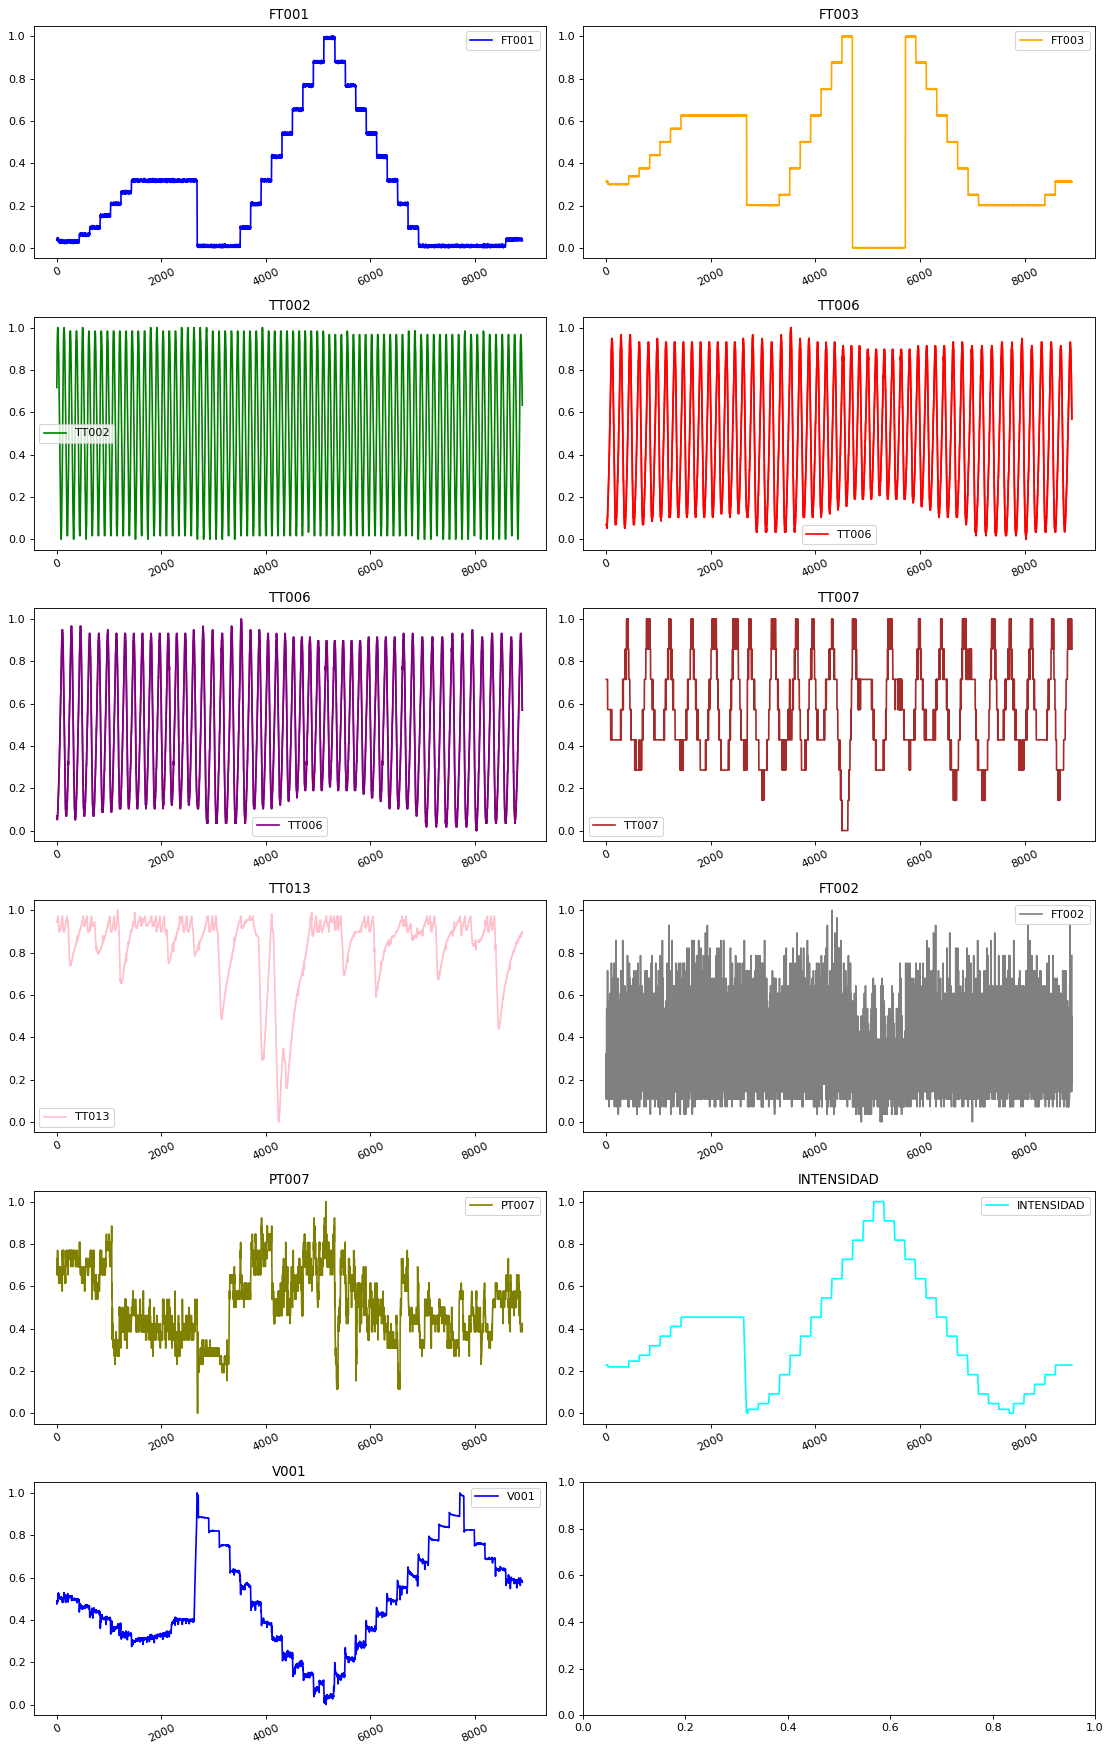

In [15]:
Visualize(df_scaled)

In [16]:
df_scaled.to_csv('data',index=False)